In [54]:
#importing needed libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#reading train and test data
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [56]:
#some general settings
pd.set_option('display.max_columns', None) 
pd.options.mode.chained_assignment = None

In [57]:
print("shape of training data:", df_train.shape)
print("shape of test data:", df_test.shape)

shape of training data: (1460, 81)
shape of test data: (1459, 80)


# Analysing Features

In [58]:
#Merging train and test data
df_all = pd.concat((df_train, df_test))
df_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [59]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [60]:
#describes only the numerical features not objects
df_all.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [61]:
df_all.isnull().any().any()

True

In [62]:
df_all['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [63]:
pd.value_counts(df_all['SalePrice']>100000, sort=False)

False    1582
True     1337
Name: SalePrice, dtype: int64

In [64]:
#Observing rows where lotarea is greater than a certain value
df_all.loc[df_all['LotArea'] >= 71000]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
249,1444,700,0,NaN,4,1Fam,TA,Gd,697.0,0.0,Rec,Unf,0.0,1.0,Gd,747.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,HdBoard,NaN,TA,2,CBlock,2,Typ,389.0,2.0,TA,Fin,TA,Attchd,1958.0,2144,0,GasA,Gd,1.5Fin,250,1,Gd,Low,Sev,159000,CulDSac,NaN,IR2,0,50,RL,472.0,BrkCmn,Shed,500,6,ClearCr,98,7,6,Y,0,NaN,CompShg,Gable,Normal,277000.0,WD,0,Pave,7,1444.0,AllPub,0,1958,2006,2007
313,2036,0,0,NaN,3,1Fam,TA,Gd,1236.0,820.0,ALQ,Rec,2.0,0.0,Gd,80.0,Y,Norm,Norm,SBrkr,0,TA,TA,BrkFace,BrkFace,NaN,Gd,2,CBlock,2,Typ,513.0,2.0,TA,RFn,TA,Attchd,1965.0,2036,0,GasW,TA,1Story,314,1,TA,Low,Sev,215245,Inside,150.0,IR3,0,20,RL,0.0,None,NaN,0,6,Timber,0,5,7,Y,0,NaN,CompShg,Hip,Normal,375000.0,WD,0,Pave,8,2136.0,AllPub,0,1965,1965,2009
335,1619,167,0,NaN,3,2fmCon,TA,Gd,1249.0,147.0,ALQ,BLQ,2.0,0.0,TA,103.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,Gd,2,CBlock,2,Typ,529.0,2.0,TA,Fin,TA,Attchd,1965.0,1786,0,GasA,Ex,1.5Fin,336,1,TA,HLS,Sev,164660,Corner,NaN,IR1,0,190,RL,0.0,None,Shed,700,8,Timber,0,6,5,Y,0,NaN,CompShg,Gable,Normal,228950.0,WD,0,Grvl,7,1499.0,AllPub,670,1965,1965,2008
706,1824,0,0,NaN,2,1Fam,TA,Gd,1219.0,0.0,GLQ,Unf,1.0,0.0,Gd,424.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,NaN,TA,2,CBlock,2,Typ,739.0,2.0,TA,Unf,TA,Attchd,1971.0,1824,0,GasA,TA,1Story,707,1,Gd,Low,Sev,115149,CulDSac,NaN,IR2,0,20,RL,351.0,Stone,NaN,0,6,ClearCr,48,5,7,Y,0,NaN,CompShg,Gable,Normal,302000.0,WD,0,Pave,5,1643.0,AllPub,380,1971,2002,2007


In [65]:
#Describing one feature based on another one
df_all.groupby('BldgType', as_index=False)['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
0,1220.0,185763.807377,82648.502922,34900.0,131475.0,167900.0,222000.0,755000.0
1,31.0,128432.258065,35458.545158,55000.0,106875.0,127500.0,142500.0,228950.0
2,52.0,133541.076923,27833.249197,82000.0,118375.0,135980.0,145000.0,206300.0
3,43.0,135911.627907,41013.222080,75000.0,95750.0,137500.0,168750.0,230000.0
4,114.0,181959.342105,60626.108918,75500.0,143187.5,172200.0,207375.0,392500.0


In [66]:
#Obtaining only mean of feature based on another one, we almost did it for all of the features
df_all.groupby('BldgType', as_index=False)['SalePrice'].mean()

,BldgType,SalePrice
0,1Fam,185763.807377
1,2fmCon,128432.258065
2,Duplex,133541.076923
3,Twnhs,135911.627907
4,TwnhsE,181959.342105


In [67]:
#describing the data by including object type 
df_all.astype('object').describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919,2919,2919,198,2919,2919,2837,2837,2918.0,2918.0,2840,2839,2917.0,2917.0,2838,2918.0,2919,2919,2919,2918,2919,2919,2919,2918,2918,571,1499,2919,2919,2919,2917,2918.0,2918.0,2760,2760,2760,2762,2760.0,2919,2919,2919,2919,2919,2919,2919,2918,2919,2919,2919,2919,2433.0,2919,2919,2919,2915,2896.0,2895,105,2919,2919,2919,2919,2919,2919,2919,2919,10,2919,2919,2919,1460.0,2918,2919,2919,2919,2918.0,2917,2919,2919,2919,2919
unique,1083,635,31,2,8,5,4,4,991.0,272.0,6,6,4.0,3.0,4,1135.0,2,9,8,5,183,5,4,15,16,4,5,5,6,5,7,603.0,6.0,5,3,5,6,103.0,1292,3,6,5,8,2919,4,4,4,3,1951,5,128.0,4,36,16,5,444.0,4,4,38,12,25,252,9,10,3,14,3,8,6,6,663.0,9,121,2,14,1058.0,2,379,118,61,5
top,864,0,0,Grvl,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,Gd,0,PConc,2,Typ,0.0,2.0,TA,Unf,TA,Attchd,2005.0,864,0,GasA,Ex,1Story,2919,1,TA,Lvl,Gtl,9600,Inside,60.0,Reg,0,20,RL,0.0,None,Shed,0,6,NAmes,0,5,5,Y,0,Ex,CompShg,Gable,Normal,140000.0,WD,0,Pave,6,0.0,AllPub,0,2005,1950,2007
freq,46,1668,2882,120,1596,2425,2606,1904,929.0,2571.0,851,2493,1705.0,2742.0,1283,241.0,2723,2511,2889,2671,2460,2538,1798,1025,1014,329,744,1420,1308,1530,2717,157.0,1594.0,2654,1230,2604,1723,142.0,41,1834,2874,1493,1471,1,2785,1492,2622,2778,44,2133,276.0,1859,2879,1079,2265,1738.0,1742,95,2816,503,443,1298,1645,825,2641,2906,4,2876,2310,2402,20.0,2525,2663,2907,844,78.0,2916,1523,142,361,692


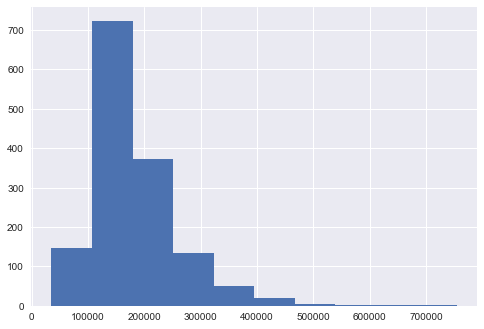

In [68]:
#plotting SalePrice
plt.hist(df_train['SalePrice'])
plt.show()
plt.close()

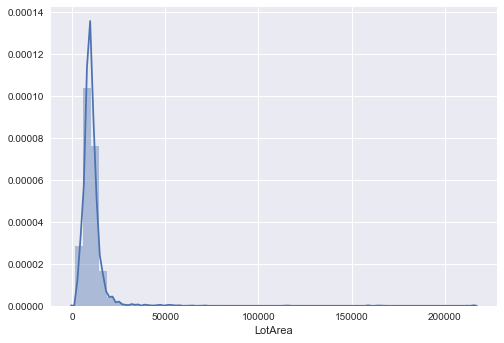

In [69]:
#Plotting LotArea
sns.distplot(df_all['LotArea'], kde=True, rug=False)
sns.plt.show()

In [70]:
#Selecting object dtype features
train_objtypes = df_all.select_dtypes(include=['object'])
x = train_objtypes.columns.values
print(x.shape)
print(x)

(43,)
['Alley' 'BldgType' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinType2' 'BsmtQual' 'CentralAir' 'Condition1' 'Condition2'
 'Electrical' 'ExterCond' 'ExterQual' 'Exterior1st' 'Exterior2nd' 'Fence'
 'FireplaceQu' 'Foundation' 'Functional' 'GarageCond' 'GarageFinish'
 'GarageQual' 'GarageType' 'Heating' 'HeatingQC' 'HouseStyle'
 'KitchenQual' 'LandContour' 'LandSlope' 'LotConfig' 'LotShape' 'MSZoning'
 'MasVnrType' 'MiscFeature' 'Neighborhood' 'PavedDrive' 'PoolQC'
 'RoofMatl' 'RoofStyle' 'SaleCondition' 'SaleType' 'Street' 'Utilities']


In [71]:
#Analysis of all obj features
for i in range(len(x)):
    print(df_all[x[i]].value_counts())

Grvl    120
Pave     78
Name: Alley, dtype: int64
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Y    2723
N     196
Name: CentralAir, dtype: int64
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
SBrkr    2671
FuseA     188
FuseF      50
FuseP    

In [72]:
columns_todrop = ['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 
                 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'BsmtFinType1',
                  'LandSlope', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior2nd',
                 'MasVnrType', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 
                  'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
                 'Heating', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
                 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Functional', 'FireplaceQu', 'GarageYrBlt',
                 'GarageFinish', 'GarageArea', 'GarageCond', 'MiscVal', 'SaleType', 'SaleCondition']

In [73]:
len(columns_todrop)

43

In [74]:
#dropping unnecessary columns
df_all.drop(columns_todrop, 1, inplace=True)
df_all.head()

,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,CentralAir,Condition1,EnclosedPorch,ExterCond,Exterior1st,Fence,Fireplaces,GarageCars,GarageQual,GarageType,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LotArea,LowQualFinSF,MasVnrArea,MiscFeature,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,3,1Fam,TA,Y,Norm,0,TA,VinylSd,NaN,0,2.0,TA,Attchd,Ex,2Story,1,1,Gd,8450,0,196.0,NaN,2,CollgCr,61,5,7,Y,0,NaN,208500.0,0,8,856.0,0,2003,2003,2008
1,0,3,1Fam,TA,Y,Feedr,0,TA,MetalSd,NaN,1,2.0,TA,Attchd,Ex,1Story,2,1,TA,9600,0,0.0,NaN,5,Veenker,0,8,6,Y,0,NaN,181500.0,0,6,1262.0,298,1976,1976,2007
2,0,3,1Fam,TA,Y,Norm,0,TA,VinylSd,NaN,1,2.0,TA,Attchd,Ex,2Story,3,1,Gd,11250,0,162.0,NaN,9,CollgCr,42,5,7,Y,0,NaN,223500.0,0,6,920.0,0,2001,2002,2008
3,0,3,1Fam,Gd,Y,Norm,272,TA,Wd Sdng,NaN,1,3.0,TA,Detchd,Gd,2Story,4,1,Gd,9550,0,0.0,NaN,2,Crawfor,35,5,7,Y,0,NaN,140000.0,0,7,756.0,0,1915,1970,2006
4,0,4,1Fam,TA,Y,Norm,0,TA,VinylSd,NaN,1,3.0,TA,Attchd,Ex,2Story,5,1,Gd,14260,0,350.0,NaN,12,NoRidge,84,5,8,Y,0,NaN,250000.0,0,9,1145.0,192,2000,2000,2008


# Data Engineering

In [75]:
#filling Nan values with zero
df_all = df_all.fillna(0)
df_all.shape

(2919, 39)

In [76]:
#condition1 feature
#df_train.Condition1[df_train.Condition1 == 'Norm'] = 1
df_all.Condition1[df_all.Condition1 != 'Norm'] = 'others'
#creating dummy variables
df_all = pd.get_dummies(df_all, columns=['Condition1'])

In [77]:
#BldgType grouoing variables
df_all['BldgType'].loc[(df_all['BldgType'] == '2fmCon') | (df_all['BldgType'] == 'Duplex') | (
    df_all['BldgType'] == 'Twnhs')] = 'others'
#Creating dummy variable for BldgType
df_all = pd.get_dummies(df_all, columns=['BldgType'])

In [78]:
#HouseStyle grouoing variables
df_all['HouseStyle'].loc[(df_all['HouseStyle'] == '1Story') | (df_all['HouseStyle'] == '1.5Fin')] = 'd1'
df_all['HouseStyle'].loc[(df_all['HouseStyle'] == '2Story') | (df_all['HouseStyle'] == '2.5Fin')] = 'd2'
df_all['HouseStyle'].loc[(df_all['HouseStyle'] == 'SLvl')] = 'd3'
df_all['HouseStyle'].loc[(df_all['HouseStyle'] != 'd1') & (df_all['HouseStyle'] != 'd2') & (df_all['HouseStyle'] != 'd3')] = 'others'
#Getting dummy variables of HouseStyle
df_all = pd.get_dummies(df_all, columns=['HouseStyle'])

In [79]:
#Grouping Ext1st 
df_all['Exterior1st'].loc[(df_all['Exterior1st'] == 'BrkFace') | (df_all['Exterior1st'] == 'CemntBd') | 
                           (df_all['Exterior1st'] == 'ImStucc') | (df_all['Exterior1st'] == 'Stone') |
                           (df_all['Exterior1st'] == 'VinylSd')] = 'H'
df_all['Exterior1st'].loc[(df_all['Exterior1st'] == 'HdBoard') | (df_all['Exterior1st'] == 'MetalSd') | 
                           (df_all['Exterior1st'] == 'Plywood') | (df_all['Exterior1st'] == 'Stucco') |
                           (df_all['Exterior1st'] == 'WdShing') | (df_all['Exterior1st'] == 'Wd Sdng')] = 'N'
df_all['Exterior1st'].loc[(df_all['Exterior1st'] != 'H') & (df_all['Exterior1st'] != 'N')] = 'others'
#Getting dummy values of Ext1st
df_all = pd.get_dummies(df_all, columns=['Exterior1st'])

In [80]:
#Replacing BsmtCond string values with actual rates
df_all['BsmtCond'].loc[df_all['BsmtCond'] == 'Gd'] = 4
df_all['BsmtCond'].loc[df_all['BsmtCond'] == 'TA'] = 3
df_all['BsmtCond'].loc[df_all['BsmtCond'] == 'Fa'] = 2
df_all['BsmtCond'].loc[df_all['BsmtCond'] == 'Po'] = 1
df_all['BsmtCond'].loc[df_all['BsmtCond'] == '0'] = 0

In [81]:
#Replacing KitchenQual string values with actual rates
df_all['KitchenQual'].loc[df_all['KitchenQual'] == 'Ex'] = 4
df_all['KitchenQual'].loc[df_all['KitchenQual'] == 'Gd'] = 3
df_all['KitchenQual'].loc[df_all['KitchenQual'] == 'TA'] = 2
df_all['KitchenQual'].loc[df_all['KitchenQual'] == 'Fa'] = 1

In [82]:
#instead of number of fireplaces, we are interested to know if we have fireplace or not
df_all['Fireplaces'].loc[df_all['Fireplaces'] !=0] = 1

In [83]:
#Selecting the useful information from garage types.
df_all['GarageType'].loc[(df_all['GarageType'] != 'Attchd') & (df_all['GarageType'] != 'Detchd') & 
                        (df_all['GarageType'] != 'BuiltIn') & (df_all['GarageType'] != 0)] = 'others'
df_all = pd.get_dummies(df_all, columns=['GarageType'])

In [84]:
#Changing Garage Quality from strings into numbers.
df_all['GarageQual'].loc[df_all['GarageQual'] == 'Ex'] = 5
df_all['GarageQual'].loc[df_all['GarageQual'] == 'Gd'] = 4
df_all['GarageQual'].loc[df_all['GarageQual'] == 'TA'] = 3
df_all['GarageQual'].loc[df_all['GarageQual'] == 'Fa'] = 2
df_all['GarageQual'].loc[df_all['GarageQual'] == 'Po'] = 1

In [85]:
#Dicarding different types of PaveDrives, focus on if it's paved or not
df_all['PavedDrive'].loc[df_all['PavedDrive'] == 'Y'] = 1
df_all['PavedDrive'].loc[df_all['PavedDrive'] != 'Y'] = 0

In [86]:
#Types of Fences are not important for us. Having/nothaving fence is more importnant
df_all['Fence'].loc[df_all['Fence'] != 0] = 1

In [87]:
#for MiscFeature, if it's not zero it shall be one! we don't care about types...
df_all['MiscFeature'].loc[df_all['MiscFeature'] !=0] = 1

In [88]:
#Creating dummy variables for Neighborhood. Probably in future we can divide them into different values 
df_all = pd.get_dummies(df_all, columns=['Neighborhood'])

In [89]:
# In case of Pool quality whether we don have pool or we have pools with different qualities.
#what we needed here indeed was not the pool quality. The important thing for use is whether the house has pool or not.
df_all['PoolQC'].loc[df_all['PoolQC'] != 0] = 1

In [90]:
#Numerically assign values to External Condition
df_all['ExterCond'].loc[df_all['ExterCond'] == 'Ex'] = 5
df_all['ExterCond'].loc[df_all['ExterCond'] == 'Gd'] = 4
df_all['ExterCond'].loc[df_all['ExterCond'] == 'TA'] = 3
df_all['ExterCond'].loc[df_all['ExterCond'] == 'Fa'] = 2
df_all['ExterCond'].loc[df_all['ExterCond'] == 'Po'] = 1

In [91]:
# for CentralAir feature, change the values from Y and N into 1 and 0
df_all['CentralAir'].loc[df_all['CentralAir'] == 'Y'] = 1
df_all['CentralAir'].loc[df_all['CentralAir'] == 'N'] = 0

In [92]:
#Numerically assign values to Heating Quality
df_all['HeatingQC'].loc[df_all['HeatingQC'] == 'Ex'] = 5
df_all['HeatingQC'].loc[df_all['HeatingQC'] == 'Gd'] = 4
df_all['HeatingQC'].loc[df_all['HeatingQC'] == 'TA'] = 3
df_all['HeatingQC'].loc[df_all['HeatingQC'] == 'Fa'] = 2
df_all['HeatingQC'].loc[df_all['HeatingQC'] == 'Po'] = 1

In [93]:
#changing nummeric monthes into season names then creating dummy variables
df_all['MoSold'] = df_all['MoSold'].apply(lambda x: (x%12+3)//3)
df_all['MoSold'].loc[df_all['MoSold'] == 1] = 'winter'
df_all['MoSold'].loc[df_all['MoSold'] == 2] = 'spring'
df_all['MoSold'].loc[df_all['MoSold'] == 3] = 'summer'
df_all['MoSold'].loc[df_all['MoSold'] == 4] = 'fall'
df_all = pd.get_dummies(df_all, columns=['MoSold'])

In [94]:
#Getting back train and test
##### Getting back to train and dropping Id, collecting target 
df_train = df_all.iloc[:df_train.shape[0], :]
df_train.drop(['Id'], 1, inplace=True)
train_target = df_train.pop('SalePrice')
##### for the test data
df_test = df_all.iloc[df_train.shape[0]:, :]
#to keep the test Id for submission file
test_ID = df_test.pop('Id')